# WEB-SCRAPING PROJECT ON MAKKAN WEBSITE:

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for web scrapping
import requests
from bs4 import BeautifulSoup 
import re
import csv


In [2]:
rates=[]
statu=[]
Area=[]
Ratepersqft=[]
localities=[]
propert=[]
buildername=[]
RERA=[]


for i in range(1,25):
    URL='https://www.makaan.com/listings?beds=1,2,3,3plus&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&page={}'.format(i)
    page = requests.get(URL)
    content=page.content
    soup = BeautifulSoup(content,'html.parser')
    
    PRICE=soup.find_all('td',class_='price')
    for i in range(len(PRICE)):
        rates.append(PRICE[i].text)
        
    
    status=soup.find_all('td',class_="val")
    for i in range(len(status)):
        statu.append(status[i].text)   
    
    
    area=soup.find_all('td',class_="size")
    for i in range(len(area)):
        Area.append(area[i].text)
    
    
    ratepersqft=soup.find_all('td',class_="lbl rate")
    for i in range(len(ratepersqft)):
        Ratepersqft.append(ratepersqft[i].text)

    
   
    
    property_type = soup.find_all('div',class_='title-line')
    for i in range(len(property_type)):
        propert.append(property_type[i].text)
   

    locality = soup.find_all('span',itemprop='addressLocality')
    for i in range(len(locality)):
        localities.append(locality[i].text)
        
    


    BULIDER=soup.find_all('span',itemprop="name")
    for i in range(len(BULIDER)):
        buildername.append(BULIDER[i].text)
    
    for i in soup.find_all('div',class_='title-line'):
        info=i.find('div',class_='rera-tag-new')
        if info is None:
            RERA.append('not approval by RERA')
        else:
            RERA.append('approval by RERA')
    

In [3]:
print(len(rates))
print(len(statu))
print(len(Area))
print(len(Ratepersqft))
print(len(localities))

print(len(propert))
print(len(buildername))
print(len(RERA))

480
480
480
480
480
480
480
480


# creating dataframe 

In [4]:
df=pd.DataFrame({'property_type':propert,'seller':buildername,'status':statu,'rate per sqft':Ratepersqft,'price':rates,'area':Area,'location':localities,
                 'RERA':RERA})

In [5]:
df.head(7)

,property_type,seller,status,rate per sqft,price,area,location,RERA
0,2 BHK Apartment in Riddhi Golden Nest,Riddhi Group,Ready to move,"6,300 / sq ft",80.95 L,1285,Puppalaguda,not approval by RERA
1,3 BHK Apartment in Vajra The Royal Park,Vajra Builders And Developers,Under Construction,"4,200 / sq ft",64.47 L,1535,Bowrampet,approval by RERA
2,3 BHK Villa in Saket Bhusatva Ph II,Saket Engineers Pvt Ltd,Under Construction,"7,749 / sq ft",2.48 Cr,3209,Kompally,approval by RERA
3,3 BHK Apartment in Anuhar Towers,Anuhar Homes Pvt Ltd,Under Construction,"6,350 / sq ft",1.16 Cr,1840,Manikonda,approval by RERA
4,3 BHK Apartment in Signature Altius,Signature Avenues,Under Construction,"4,999 / sq ft",94.98 L,1900,Kollur,approval by RERA
5,3 BHK Apartment in Candeur Crescent,Candeur Developers And Builders,Under Construction,"7,810 / sq ft",1.99 Cr,2548,Serilingampally,approval by RERA
6,2 BHK Apartment in MKT Urban Tree,MKT Praneeth Homes,Under Construction,"3,800 / sq ft",43.47 L,1144,Isnapur,approval by RERA


In [6]:
df.shape

(480, 8)

In [7]:
df.to_csv('realestates.csv')

In [8]:
df = pd.read_csv('realestates.csv') 

In [9]:
df

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA
0,0,2 BHK Apartment in Riddhi Golden Nest,Riddhi Group,Ready to move,"6,300 / sq ft",80.95 L,1285,Puppalaguda,not approval by RERA
1,1,3 BHK Apartment in Vajra The Royal Park,Vajra Builders And Developers,Under Construction,"4,200 / sq ft",64.47 L,1535,Bowrampet,approval by RERA
2,2,3 BHK Villa in Saket Bhusatva Ph II,Saket Engineers Pvt Ltd,Under Construction,"7,749 / sq ft",2.48 Cr,3209,Kompally,approval by RERA
3,3,3 BHK Apartment in Anuhar Towers,Anuhar Homes Pvt Ltd,Under Construction,"6,350 / sq ft",1.16 Cr,1840,Manikonda,approval by RERA
4,4,3 BHK Apartment in Signature Altius,Signature Avenues,Under Construction,"4,999 / sq ft",94.98 L,1900,Kollur,approval by RERA
...,...,...,...,...,...,...,...,...,...
475,475,4 BHK Apartment in Swaraj Homes Kendriya Vihar...,seller,Ready to move,"4,621 / sq ft",77 L,1666,Bandlaguda Jagir,not approval by RERA
476,476,2 BHK Apartment in Provident Kenworth,seller,Ready to move,"6,896 / sq ft",64 L,928,Rajendra Nagar,not approval by RERA
477,477,3 BHK Apartment,seller,Under Construction,"4,621 / sq ft",55.5 L,1201,Bandlaguda Jagir,not approval by RERA
478,478,2 BHK Apartment in Spectra Metro Heights,seller,Ready to move,"6,067 / sq ft",75 L,1236,Nagole,not approval by RERA


# Identifying missing values in rows

In [10]:
df.isnull().sum(axis=0)

Unnamed: 0       0
property_type    0
seller           0
status           0
rate per sqft    0
price            0
area             0
location         0
RERA             0
dtype: int64

# Identifying missing values in columns

In [11]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Length: 480, dtype: int64

In [12]:
df.property_type.value_counts()

3 BHK Apartment in Anuhar Rami Reddy Towers        38
3 BHK Apartment in Anuhar Art Of Living            27
2 BHK Apartment                                    24
2 BHK Apartment in Anuhar Art Of Living            15
3 BHK Apartment in Riddhi Pramukh Elegance         15
                                                   ..
2 BHK Apartment in Idream Sai RKs Oxygen Homes      1
3 BHK Apartment in Swaraj Homes Mandadi Mansion     1
2 BHK Apartment in Praneeth Pranav Flora            1
2 BHK Apartment in Concept Onyx                     1
3 BHK Apartment in Empire Meadows                   1
Name: property_type, Length: 123, dtype: int64

# extracting Bhk

In [13]:
df['BHK']=df.property_type.apply(lambda x: x.split(' ')[0])

In [14]:
df.BHK.value_counts()

3    278
2    146
4     48
5      4
7      2
8      2
Name: BHK, dtype: int64

In [15]:
df.BHK.isnull().sum()

0

# extracting Bhk projectname

In [16]:
df['projectname']=df.property_type.apply(lambda x: ' '.join(x.split(' ')[4:]))

In [17]:
df.projectname.value_counts()

                                                50
Anuhar Art Of Living                            42
Anuhar Rami Reddy Towers                        42
Riddhi Pramukh Elegance                         22
Pragathi S Raghupathi County                    16
                                                ..
Idream Sai RKs Oxygen Homes                      1
Shree Anurag Sri Sai Anurag New Town Phase 2     1
Greenmetro Tulasi Bhagyanagar                    1
Northstar Hillside                               1
Empire Meadows                                   1
Name: projectname, Length: 77, dtype: int64

In [18]:
df.area.value_counts()

1100    7
1200    7
1550    6
1785    5
1250    5
       ..
1685    1
2530    1
2465    1
2065    1
1236    1
Name: area, Length: 306, dtype: int64

In [19]:
df.projectname.replace(to_replace="",value="not mentioned",inplace=True)

In [20]:
df.projectname.value_counts()

not mentioned                                   50
Anuhar Art Of Living                            42
Anuhar Rami Reddy Towers                        42
Riddhi Pramukh Elegance                         22
Pragathi S Raghupathi County                    16
                                                ..
Idream Sai RKs Oxygen Homes                      1
Shree Anurag Sri Sai Anurag New Town Phase 2     1
Greenmetro Tulasi Bhagyanagar                    1
Northstar Hillside                               1
Empire Meadows                                   1
Name: projectname, Length: 77, dtype: int64

In [21]:
df[(df['projectname']=='not mentioned') & (df['seller']=='seller')]

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA,BHK,projectname
314,314,3 BHK Apartment,seller,Ready to move,"4,246 / sq ft",62 L,1460,Dilsukh Nagar,not approval by RERA,3,not mentioned
315,315,2 BHK Independent House,seller,Ready to move,"6,363 / sq ft",70 L,1100,Laxmiguda,not approval by RERA,2,not mentioned
316,316,2 BHK Apartment,seller,Under Construction,"4,833 / sq ft",58 L,1200,Pragathi Nagar Kukatpally,not approval by RERA,2,not mentioned
318,318,2 BHK Apartment,seller,Under Construction,"5,000 / sq ft",60 L,1200,Kompally,not approval by RERA,2,not mentioned
319,319,2 BHK Apartment,seller,Ready to move,"4,000 / sq ft",40 L,1000,Kapra,not approval by RERA,2,not mentioned
320,320,2 BHK Apartment,seller,Ready to move,"4,000 / sq ft",40 L,1000,Kapra,not approval by RERA,2,not mentioned
324,324,2 BHK Independent House,seller,Ready to move,"4,761 / sq ft",50 L,1050,Laxmiguda,not approval by RERA,2,not mentioned
325,325,3 BHK Apartment,seller,Ready to move,"4,736 / sq ft",72 L,1520,Puppalaguda,not approval by RERA,3,not mentioned
326,326,3 BHK Independent House,seller,Ready to move,"4,500 / sq ft",1.8 Cr,4000,Vanasthalipuram,not approval by RERA,3,not mentioned
328,328,2 BHK Independent House,seller,Ready to move,"5,619 / sq ft",59 L,1050,Laxmiguda,not approval by RERA,2,not mentioned


# extracting property_type

In [22]:
df['property_type']=df.property_type.apply(lambda x: x.split(' ')[2])

In [23]:
df.property_type.value_counts()

Apartment      414
Villa           44
Independent     22
Name: property_type, dtype: int64

# rate per sqft

# rate per sqft

In [24]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x : x.split(' ')[0])

In [25]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x:"".join(x.split(',')))

In [26]:
df['rate per sqft'].value_counts()

6000     45
6400     42
5600     30
6300     18
5400     17
         ..
9009      1
9666      1
5705      1
10344     1
5750      1
Name: rate per sqft, Length: 142, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     480 non-null    int64 
 1   property_type  480 non-null    object
 2   seller         480 non-null    object
 3   status         480 non-null    object
 4   rate per sqft  480 non-null    object
 5   price          480 non-null    object
 6   area           480 non-null    int64 
 7   location       480 non-null    object
 8   RERA           480 non-null    object
 9   BHK            480 non-null    object
 10  projectname    480 non-null    object
dtypes: int64(2), object(9)
memory usage: 41.4+ KB


In [28]:
df['rate per sqft']=df['rate per sqft'].astype(float)
df.BHK=df.BHK.astype(int)


# price in lakhs

In [29]:
df.price.value_counts()

 1.09 Cr    14
 1.16 Cr    11
 1.03 Cr     9
 1.07 Cr     8
 1.14 Cr     8
            ..
 42.78 L     1
 38.98 L     1
 38.3 L      1
 37.84 L     1
 55.5 L      1
Name: price, Length: 279, dtype: int64

# converting crores to lakhs

In [30]:
rate=[]
for i in df['price']:
    if i.split()[-1]=='Cr':
        rate.append(round(float(i.split()[0])*100,2))
    else:
        rate.append(float(i.split()[0]))

In [31]:
rate

[80.95,
 64.47,
 248.0,
 116.0,
 94.98,
 199.0,
 43.47,
 108.0,
 85.15,
 364.0,
 220.0,
 141.0,
 50.01,
 85.18,
 456.0,
 120.0,
 64.72,
 61.83,
 155.0,
 104.0,
 64.54,
 129.0,
 486.0,
 62.93,
 84.45,
 777.0,
 219.0,
 115.0,
 82.65,
 189.0,
 49.72,
 265.0,
 102.0,
 51.87,
 109.0,
 93.8,
 69.41,
 93.8,
 98.52,
 90.75,
 107.0,
 53.55,
 295.0,
 83.75,
 121.0,
 207.0,
 47.08,
 104.0,
 152.0,
 341.0,
 135.0,
 120.0,
 54.67,
 62.14,
 446.0,
 112.0,
 79.71,
 79.92,
 147.0,
 75.69,
 50.14,
 91.18,
 375.0,
 76.33,
 922.0,
 650.0,
 117.0,
 101.0,
 213.0,
 52.16,
 234.0,
 117.0,
 236.0,
 109.0,
 68.15,
 65.97,
 68.15,
 94.14,
 68.75,
 81.77,
 70.35,
 164.0,
 116.0,
 69.23,
 211.0,
 37.54,
 92.12,
 99.77,
 351.0,
 160.0,
 161.0,
 53.8,
 57.34,
 450.0,
 84.98,
 109.0,
 78.84,
 128.0,
 98.89,
 198.0,
 104.0,
 161.0,
 92.01,
 83.56,
 91.82,
 122.0,
 118.0,
 106.0,
 98.48,
 122.0,
 122.0,
 109.0,
 93.73,
 77.48,
 90.98,
 70.98,
 109.0,
 69.98,
 81.73,
 146.0,
 152.0,
 201.0,
 137.0,
 150.0,
 133.0,
 13

In [32]:
df['price(in_lakhs)']=rate
df.drop('price',axis=1,inplace=True)

In [33]:
df.head()

,Unnamed: 0,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,0,Apartment,Riddhi Group,Ready to move,6300.0,1285,Puppalaguda,not approval by RERA,2,Riddhi Golden Nest,80.95
1,1,Apartment,Vajra Builders And Developers,Under Construction,4200.0,1535,Bowrampet,approval by RERA,3,Vajra The Royal Park,64.47
2,2,Villa,Saket Engineers Pvt Ltd,Under Construction,7749.0,3209,Kompally,approval by RERA,3,Saket Bhusatva Ph II,248.00
3,3,Apartment,Anuhar Homes Pvt Ltd,Under Construction,6350.0,1840,Manikonda,approval by RERA,3,Anuhar Towers,116.00
4,4,Apartment,Signature Avenues,Under Construction,4999.0,1900,Kollur,approval by RERA,3,Signature Altius,94.98


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       480 non-null    int64  
 1   property_type    480 non-null    object 
 2   seller           480 non-null    object 
 3   status           480 non-null    object 
 4   rate per sqft    480 non-null    float64
 5   area             480 non-null    int64  
 6   location         480 non-null    object 
 7   RERA             480 non-null    object 
 8   BHK              480 non-null    int32  
 9   projectname      480 non-null    object 
 10  price(in_lakhs)  480 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 39.5+ KB


In [35]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [36]:
df.shape

(480, 10)

In [37]:
df.describe()

,rate per sqft,area,BHK,price(in_lakhs)
count,480.000000,480.000000,480.000000,480.000000
mean,6205.677083,1938.500000,2.850000,128.363708
std,1861.008276,1040.351021,0.766196,118.213625
min,1778.000000,720.000000,2.000000,23.000000
25%,5400.000000,1307.250000,2.000000,75.660000
50%,6000.000000,1725.500000,3.000000,103.000000
75%,6400.000000,2063.250000,3.000000,129.000000
max,20000.000000,9000.000000,8.000000,1400.000000


In [38]:
df.describe(include=object)

,property_type,seller,status,location,RERA,projectname
count,480,480,480,480,480,480
unique,3,42,2,69,2,77
top,Apartment,Anuhar Homes Pvt Ltd,Under Construction,Manikonda,approval by RERA,not mentioned
freq,414,97,363,101,350,50


In [39]:
df.isnull().sum()

property_type      0
seller             0
status             0
rate per sqft      0
area               0
location           0
RERA               0
BHK                0
projectname        0
price(in_lakhs)    0
dtype: int64

In [40]:
df.columns

Index(['property_type', 'seller', 'status', 'rate per sqft', 'area',
       'location', 'RERA', 'BHK', 'projectname', 'price(in_lakhs)'],
      dtype='object')

In [41]:
df

,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,Apartment,Riddhi Group,Ready to move,6300.0,1285,Puppalaguda,not approval by RERA,2,Riddhi Golden Nest,80.95
1,Apartment,Vajra Builders And Developers,Under Construction,4200.0,1535,Bowrampet,approval by RERA,3,Vajra The Royal Park,64.47
2,Villa,Saket Engineers Pvt Ltd,Under Construction,7749.0,3209,Kompally,approval by RERA,3,Saket Bhusatva Ph II,248.00
3,Apartment,Anuhar Homes Pvt Ltd,Under Construction,6350.0,1840,Manikonda,approval by RERA,3,Anuhar Towers,116.00
4,Apartment,Signature Avenues,Under Construction,4999.0,1900,Kollur,approval by RERA,3,Signature Altius,94.98
...,...,...,...,...,...,...,...,...,...,...
475,Apartment,seller,Ready to move,4621.0,1666,Bandlaguda Jagir,not approval by RERA,4,Swaraj Homes Kendriya Vihar Phase 3,77.00
476,Apartment,seller,Ready to move,6896.0,928,Rajendra Nagar,not approval by RERA,2,Provident Kenworth,64.00
477,Apartment,seller,Under Construction,4621.0,1201,Bandlaguda Jagir,not approval by RERA,3,not mentioned,55.50
478,Apartment,seller,Ready to move,6067.0,1236,Nagole,not approval by RERA,2,Spectra Metro Heights,75.00


# DATA VISUALIZATION

In [42]:
import warnings
warnings.filterwarnings('ignore')

# UNIVARIATE ANALYSIS

# 1.count plot

(0.0, 500.0)

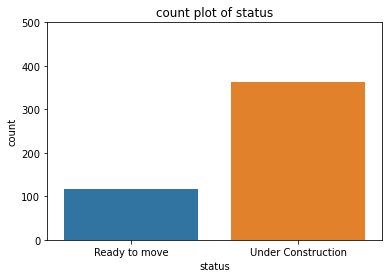

In [43]:
sns.countplot(df['status'])
plt.title('count plot of status')
plt.ylim((0,500))

In [44]:
df.status.value_counts()

Under Construction    363
Ready to move         117
Name: status, dtype: int64

Observation : The most of houses are under construction 

Text(0.5, 1.0, 'count plot on BHK')

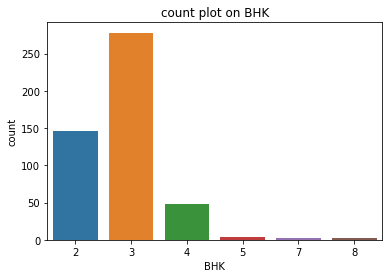

In [45]:
sns.countplot(df['BHK'])
plt.title('count plot on BHK')

In [46]:
df['BHK'].value_counts()

3    278
2    146
4     48
5      4
7      2
8      2
Name: BHK, dtype: int64

The number of  3 BHK houses are more available

(0.0, 500.0)

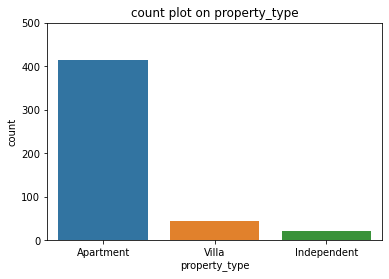

In [47]:
sns.countplot(df['property_type'])
plt.title('count plot on property_type')
plt.ylim((0,500))

In [48]:
df['property_type'].value_counts()

Apartment      414
Villa           44
Independent     22
Name: property_type, dtype: int64

most of the houses are apartment type

# 2.distribution plot

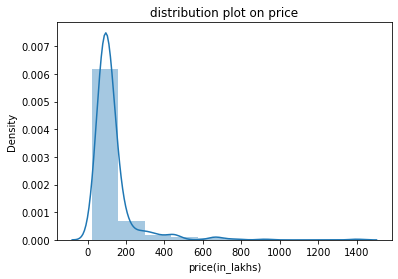

In [49]:
sns.distplot(df['price(in_lakhs)'],bins=10)
plt.title('distribution plot on price')
plt.show()

In [50]:
df['price(in_lakhs)'].value_counts()

109.00    14
116.00    11
103.00     9
107.00     8
114.00     8
          ..
42.78      1
38.98      1
38.30      1
37.84      1
55.50      1
Name: price(in_lakhs), Length: 279, dtype: int64

# 3.Box plot

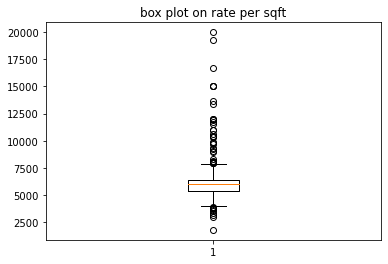

In [51]:
plt.boxplot(df['rate per sqft'])
plt.title('box plot on rate per sqft')
plt.show()

In [52]:
df['rate per sqft'].value_counts()

6000.0     45
6400.0     42
5600.0     30
6300.0     18
5400.0     17
           ..
9009.0      1
9666.0      1
5705.0      1
10344.0     1
5750.0      1
Name: rate per sqft, Length: 142, dtype: int64

Observation: most of the values are spread between 0 and 20000

# 4.histogram

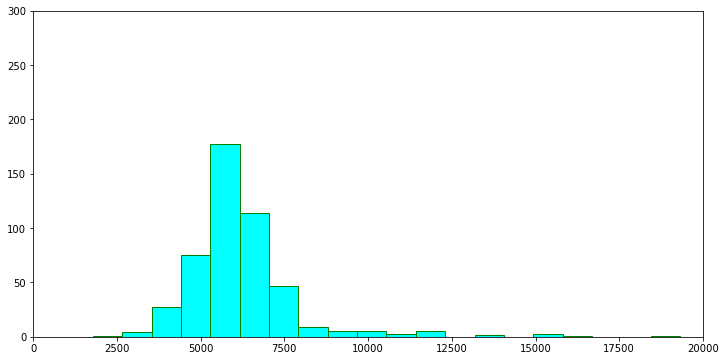

In [53]:
df_ratepersqft=df[df['rate per sqft']<20000]
plt.figure(figsize=(12,6))
plt.hist(df_ratepersqft['rate per sqft'],bins=20,color='cyan',edgecolor='green')
plt.xlim((0,20000))
plt.ylim((0,300))
plt.show()


In [54]:
df['rate per sqft'].value_counts()

6000.0     45
6400.0     42
5600.0     30
6300.0     18
5400.0     17
           ..
9009.0      1
9666.0      1
5705.0      1
10344.0     1
5750.0      1
Name: rate per sqft, Length: 142, dtype: int64

Observation: most of houses have 6500 to 7500 rs/sqft

# BIVARIATE ANALYSIS

In [55]:
pd.pivot_table(data=df,index=['property_type','BHK'],values=['price(in_lakhs)'])

price(in_lakhs)
property_type BHK                 
Apartment     2          66.969568
              3         115.533333
              4         220.071429
Independent   2          69.428571
              3         156.600000
              4         231.741667
              7         227.500000
              8         270.000000
Villa         3         176.333333
              4         396.862857
              5         547.000000

# 1.Bar plot 

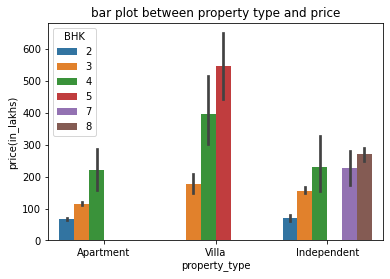

In [56]:
sns.barplot(x='property_type',y='price(in_lakhs)',hue="BHK",data=df)
plt.title('bar plot between property type and price')
plt.show()

# 2.Line chart

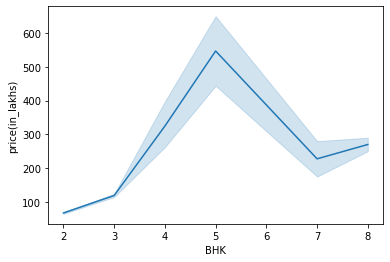

In [57]:
sns.lineplot(x='BHK',y='price(in_lakhs)',data=df)
plt.show()

# 3.scatter plot

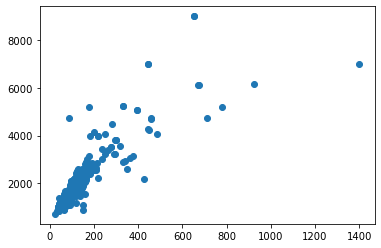

In [58]:
plt.scatter(x='price(in_lakhs)',y='area',data=df)
plt.show()

Observation : price and area are highly positively correlated

# 4.pair plot

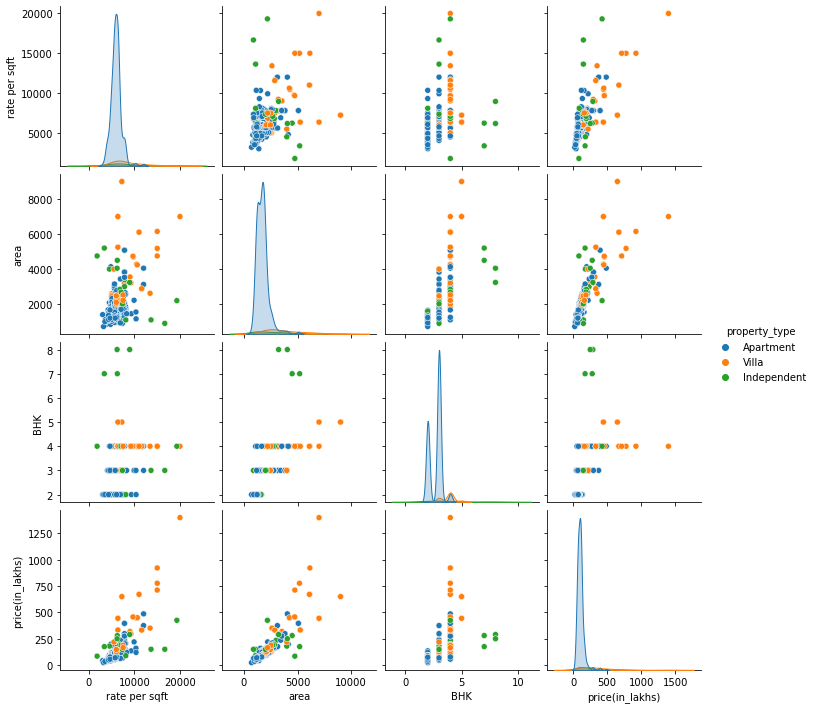

In [59]:
sns.pairplot(data=df,hue='property_type')
plt.show()


# comparing prices in some perticular locations

In [60]:
loc=df['location'].value_counts()[0:10]

In [61]:
loc.index

Index(['Manikonda', 'Jeedimetla', 'Kollur', 'Yapral', 'Nizampet',
       'Pragathi Nagar Kukatpally', 'Kompally', 'Serilingampally',
       'Saroor Nagar', 'Manchirevula'],
      dtype='object')

In [62]:
df_loc=df[(df['location'].isin(loc.index))]

In [63]:
df_loc.shape

(261, 10)

In [64]:
df_loc['location'].value_counts().to_frame()

,location
Manikonda,101
Jeedimetla,32
Kollur,25
Yapral,19
Nizampet,18
Pragathi Nagar Kukatpally,17
Kompally,13
Serilingampally,13
Saroor Nagar,12
Manchirevula,11


<AxesSubplot:>

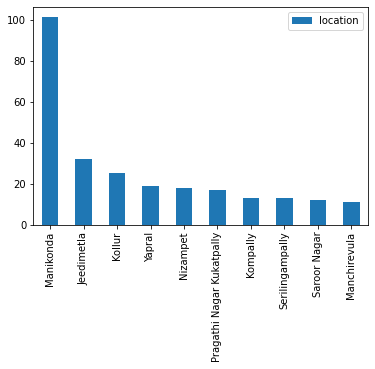

In [65]:
df_loc['location'].value_counts().to_frame().plot(kind='bar')

In [66]:
pd.pivot_table(data=df_loc,index=['location','BHK'],values=['rate per sqft'])

rate per sqft
location                  BHK               
Jeedimetla                2      5580.000000
                          3      5562.500000
                          4      5600.000000
Kollur                    2      4948.875000
                          3      5022.294118
Kompally                  2      4772.666667
                          3      5891.857143
Manchirevula              2      6799.000000
                          3      6799.000000
Manikonda                 2      6098.111111
                          3      6245.310811
Nizampet                  2      5862.125000
                          3      6211.111111
                          4      4480.000000
Pragathi Nagar Kukatpally 2      5513.833333
                          3      5650.000000
Saroor Nagar              2      6500.000000
                          3      6500.500000
Serilingampally           3      7856.923077
Yapral                    2      5402.800000
                          3      5723.384615
                          4      5752.000000

Text(0.5, 1.0, 'Bar plot Representation of locations')

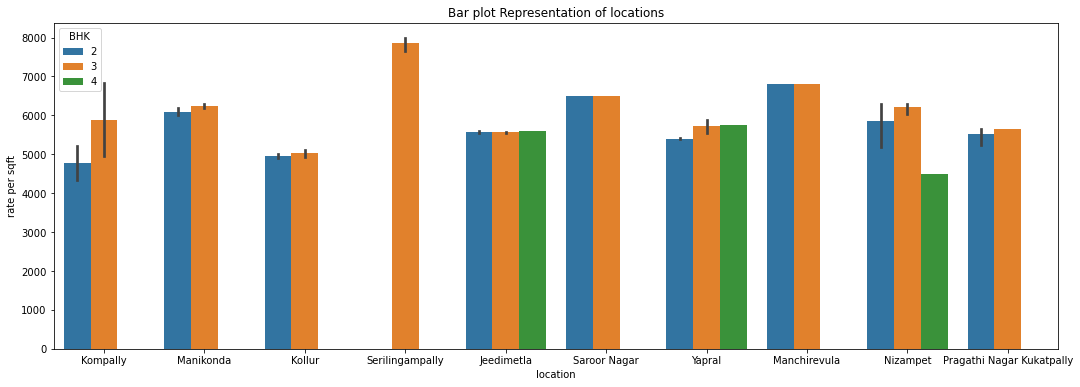

In [67]:
#rate per sqft with BHK based on locations
plt.figure(figsize=(18,6))
sns.barplot(x='location', y='rate per sqft',hue='BHK' ,data=df_loc)
plt.title('Bar plot Representation of locations')

observation : houses in kismatpur are more costly

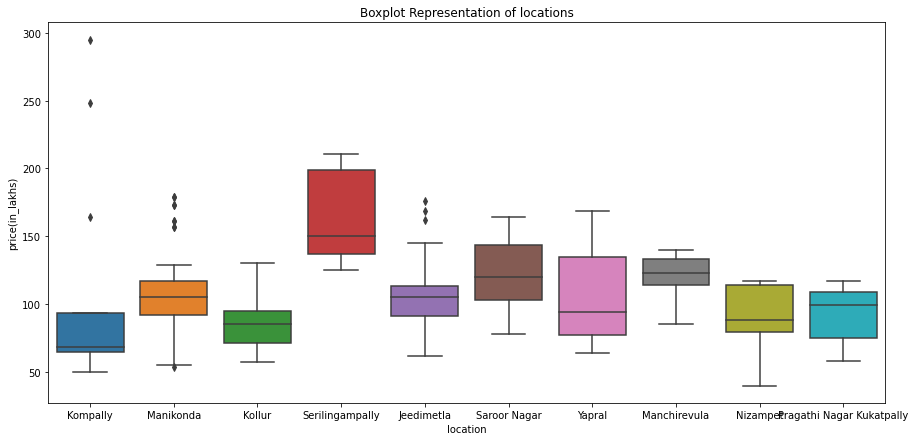

In [68]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_loc,x='location',y='price(in_lakhs)')
plt.title('Boxplot Representation of locations')
plt.show()

 Observation : we can observe max and min cost of houses at each location

In [69]:
pd.pivot_table(data=df_loc,index=['location','property_type'],values=['price(in_lakhs)'])

price(in_lakhs)
location                  property_type                 
Jeedimetla                Apartment           106.172188
Kollur                    Apartment            87.003600
Kompally                  Apartment            68.616000
                          Villa               235.666667
Manchirevula              Apartment           119.516364
Manikonda                 Apartment           106.196139
Nizampet                  Apartment            91.722222
Pragathi Nagar Kukatpally Apartment            92.478235
Saroor Nagar              Apartment           122.215833
Serilingampally           Apartment           160.692308
Yapral                    Apartment           106.617895

# Relation plot:

<Figure size 432x288 with 0 Axes>

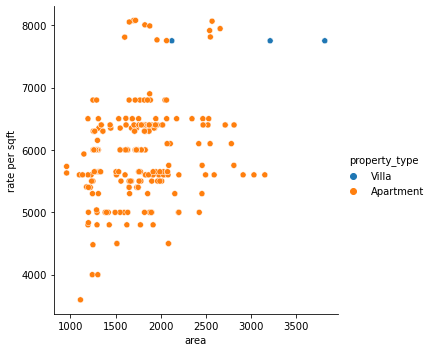

In [70]:
plt.figure(figsize=(6,4))
sns.relplot(x="area",y="rate per sqft",color='k',hue='property_type',data=df_loc)

# heatmap:

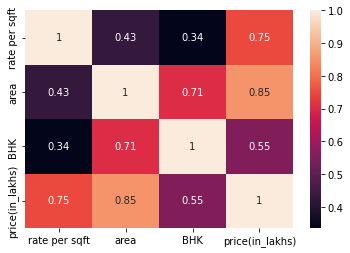

In [71]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [72]:
df.corr()

,rate per sqft,area,BHK,price(in_lakhs)
rate per sqft,1.000000,0.428636,0.335516,0.747695
area,0.428636,1.000000,0.705469,0.853716
BHK,0.335516,0.705469,1.000000,0.551500
price(in_lakhs),0.747695,0.853716,0.551500,1.000000


# comparing rate by seller

In [73]:
df_loc['seller'].value_counts().to_frame()

,seller
Anuhar Homes Pvt Ltd,97
Riddhi Group,22
Maaruthi Group,16
G K Constructions,14
Vazhraa Nirmaan Pvt Ltd,14
Candeur Developers And Builders,13
Aavasa Constructions,11
Hallmark Builders,11
Signature Avenues,10
Vasavi Group,10


<AxesSubplot:>

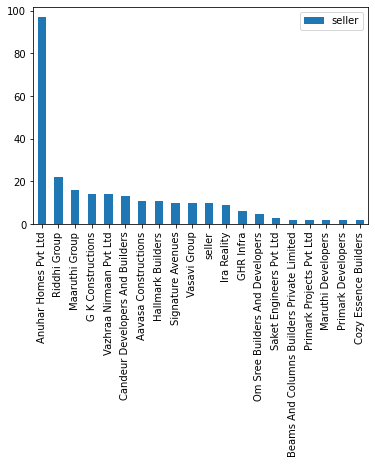

In [74]:
df_loc['seller'].value_counts().to_frame().plot(kind='bar')

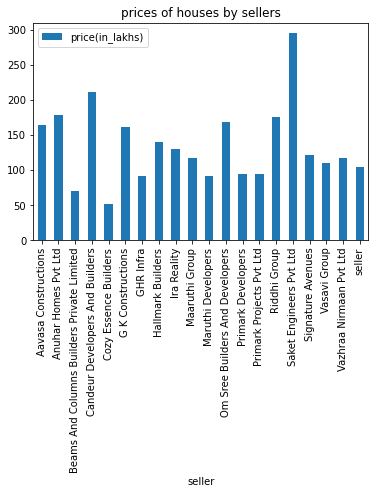

In [75]:
df_loc.groupby('seller')['price(in_lakhs)'].max().to_frame().plot(kind='bar')
plt.title('prices of houses by sellers')
plt.show()

Observation : the 'Vessella Group' is selling the houses for more prices

In [76]:
df_loc.groupby('seller')['property_type'].unique().to_frame()

,property_type
seller,
Aavasa Constructions,[Apartment]
Anuhar Homes Pvt Ltd,[Apartment]
Beams And Columns Builders Private Limited,[Apartment]
Candeur Developers And Builders,[Apartment]
Cozy Essence Builders,[Apartment]
G K Constructions,[Apartment]
GHR Infra,[Apartment]
Hallmark Builders,[Apartment]
Ira Reality,[Apartment]


# Bubble plot:

Text(0.5, 1.0, 'Bubble plot of area / rate per sqft of sellers in locations')

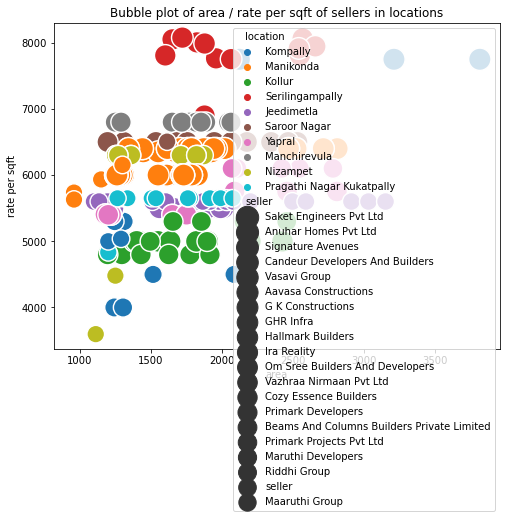

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='area', y='rate per sqft',size='seller', hue='location',sizes=(300,500),alpha=1.0,
                data=df_loc)
plt.title('Bubble plot of area / rate per sqft of sellers in locations')